In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

from config.path import get_training_data_path, get_checkpoint_path, DATASET_PATH_TYPE


from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests

import matplotlib.pyplot as plt
import cv2

from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests


In [2]:
import os
import numpy as np
import cv2
from PIL import Image
import torch
import matplotlib.pyplot as plt
from transformers import YolosFeatureExtractor, YolosForObjectDetection

# Assuming you have these functions available
# from your_module import get_training_data_path, remove_shadow_rgb

# Load the pre-trained model and feature extractor
# model_name = "valentinafeve/yolos-fashionpedia"
# feature_extractor = YolosFeatureExtractor.from_pretrained(model_name)
# model = YolosForObjectDetection.from_pretrained(model_name)

model = YolosForObjectDetection.from_pretrained('valentinafeve/yolos-fashionpedia')
image_processor = YolosImageProcessor.from_pretrained("valentinafeve/yolos-fashionpedia")


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


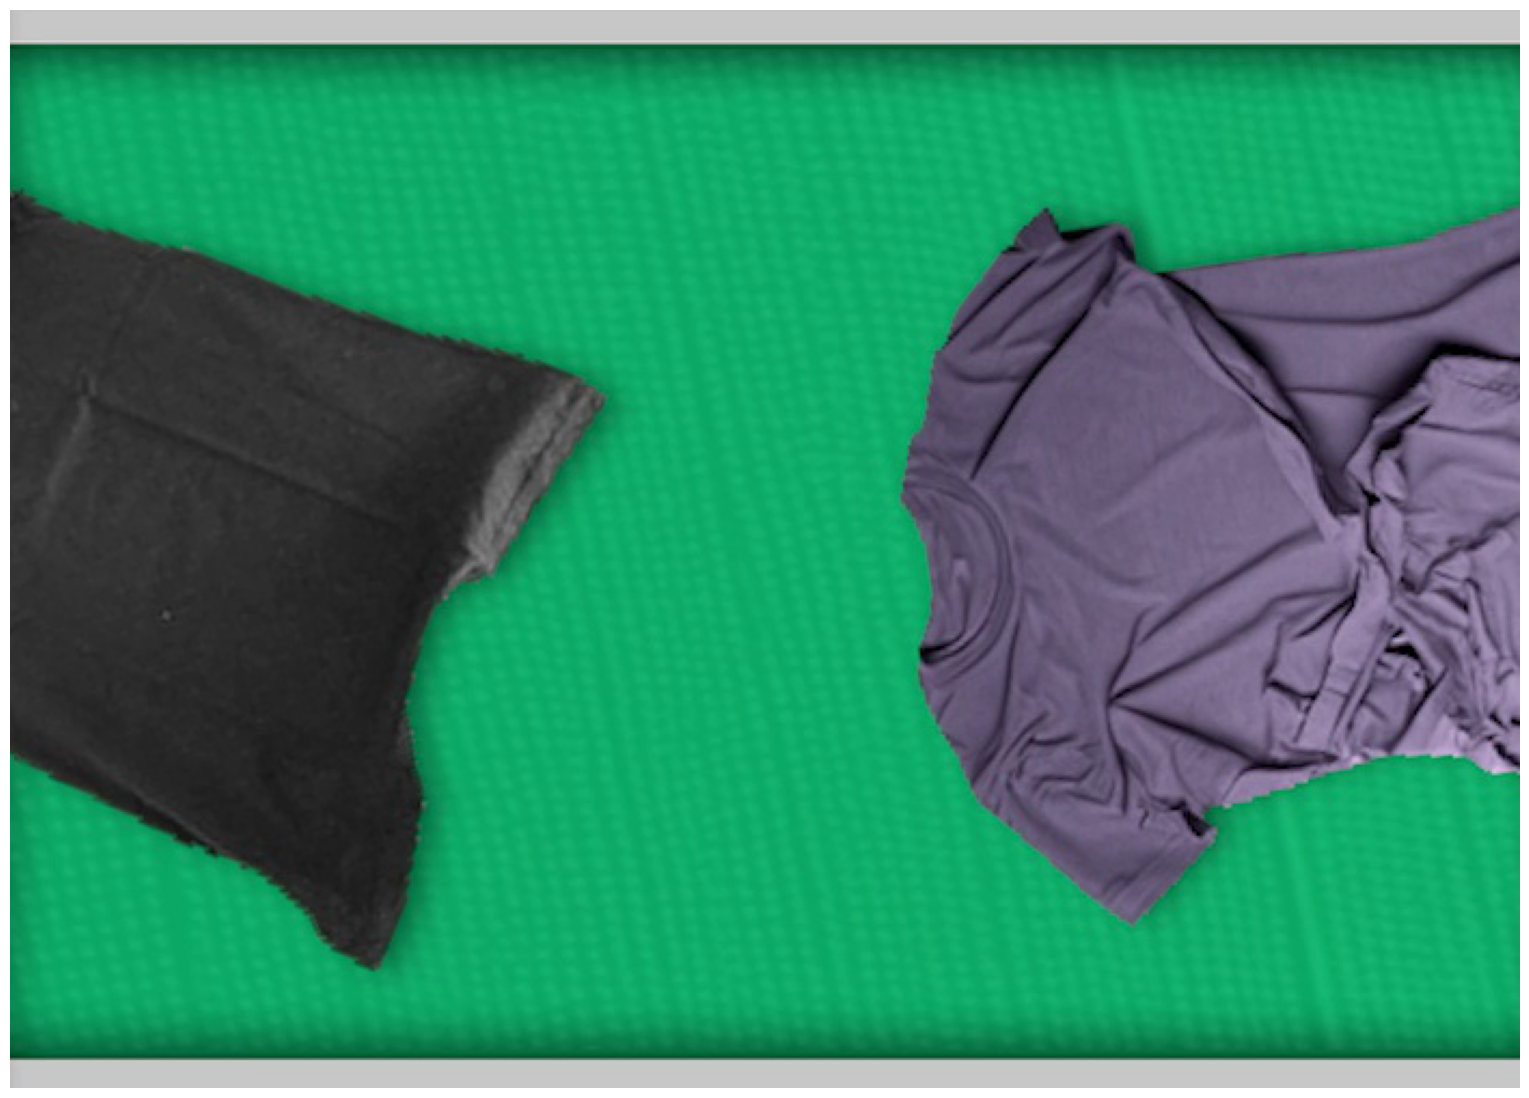

In [6]:

# Load and preprocess the image
relative_path = get_training_data_path('production', 'band')
fullpath = os.path.join(relative_path, 'frame_orig_55.jpg')
image = Image.open(fullpath)
image = image.rotate(0)

h, w = image.size

x = w / 2

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes



# Define your target_sizes and outputs
target_sizes = torch.tensor([image.size[::-1]])
# Assuming outputs contain predictions from your model
# You'll need to replace 'outputs' with the actual variable containing your model outputs
# Adjust threshold according to your requirement
results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

# Print detected objects and confidence scores
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.detach().numpy().tolist()]  # Detach tensor and convert to numpy array
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

# Plot image with bounding boxes
plt.figure(figsize=(10, 10))
# Assuming 'image' is your input image
plt.imshow(image)
ax = plt.gca()

for box, score, label in zip(results['boxes'], results['scores'], results['labels']):
    box = box.detach().numpy()  # Detach tensor and convert to numpy array
    x_min, y_min, x_max, y_max = box
    box_width = x_max - x_min
    box_height = y_max - y_min

    

    # Create a rectangle patch
    rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

    # Add label and confidence score
    ax.text(x_min, y_min - 2, f'{model.config.id2label[label.item()]}: {score.item():0.2f}', fontsize=12, color='red')


plt.axis('off')
plt.show()

plt.show()
